In [26]:
#IMPORTAR LIBRERÍAS
#Tratamiento de datos
import pandas as pd #Estructura de datos
import numpy as np #Ecuaciones matemáticas de forma matricial
import statsmodels.api as sm #Métodos estadísticos para calcular pruebas

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

#Modelado
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Advertencias
import warnings
warnings.filterwarnings('ignore')

In [6]:
#PROBLEMA: Determinar bajo las notas de la asignatura matemáticas si un estudiante tiene la posibilidad de recibir matrícula de honor
#y: 0, no merece; 1:merece

matricula = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
                     0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
                     0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                     0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                     1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
                     1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
                     1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
                     0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                     0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
                     0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
                     0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

matematicas = np.array([41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, 57, 50, 43,
                  51, 60, 62, 57, 35, 75, 45, 57, 45, 46, 66, 57, 49, 49, 57, 64,
                  63, 57, 50, 58, 75, 68, 44, 40, 41, 62, 57, 43, 48, 63, 39, 70,
                  63, 59, 61, 38, 61, 49, 73, 44, 42, 39, 55, 52, 45, 61, 39, 41,
                  50, 40, 60, 47, 59, 49, 46, 58, 71, 58, 46, 43, 54, 56, 46, 54,
                  57, 54, 71, 48, 40, 64, 51, 39, 40, 61, 66, 49, 65, 52, 46, 61,
                  72, 71, 40, 69, 64, 56, 49, 54, 53, 66, 67, 40, 46, 69, 40, 41,
                  57, 58, 57, 37, 55, 62, 64, 40, 50, 46, 53, 52, 45, 56, 45, 54,
                  56, 41, 54, 72, 56, 47, 49, 60, 54, 55, 33, 49, 43, 50, 52, 48,
                  58, 43, 41, 43, 46, 44, 43, 61, 40, 49, 56, 61, 50, 51, 42, 67,
                  53, 50, 51, 72, 48, 40, 53, 39, 63, 51, 45, 39, 42, 62, 44, 65,
                  63, 54, 45, 60, 49, 48, 57, 55, 66, 64, 55, 42, 56, 53, 41, 42,
                  53, 42, 60, 52, 38, 57, 58, 65])

#EXPLORACIÓN DE DATOS
datos = pd.DataFrame({'Matemáticas':matematicas, 'Matrícula':matricula})
datos.head(10)

,Matemáticas,Matrícula
0,41,0
1,53,0
2,54,0
3,47,0
4,57,0
5,51,0
6,42,0
7,45,0
8,54,0
9,52,0


In [13]:
#BALANCEO DE SALIDA
datos.Matrícula.value_counts().sort_index()

0    151
1     49
Name: Matrícula, dtype: int64

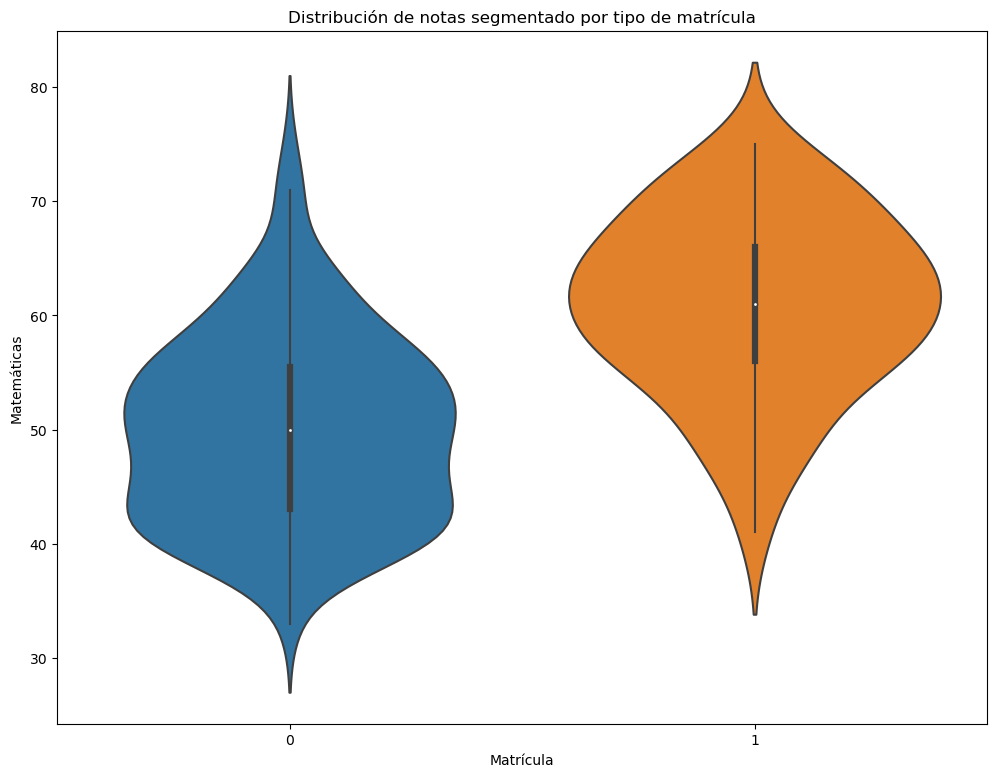

In [12]:
#GRÁFICO DE VIOLÍN
fig, ax = plt.subplots(figsize = (12,9))
sb.violinplot( x = 'Matrícula',
             y = 'Matemáticas',
             data = datos,
             ax = ax)
ax.set_title('Distribución de notas segmentado por tipo de matrícula')
plt.show()

In [19]:
#PREPARAR DATOS
X = datos[['Matemáticas']]
y = datos[['Matrícula']]

In [20]:
XEntrenamiento, XPrueba, yEntrenamiento, yPrueba = train_test_split(X, y, train_size = 0.7, random_state = 123)

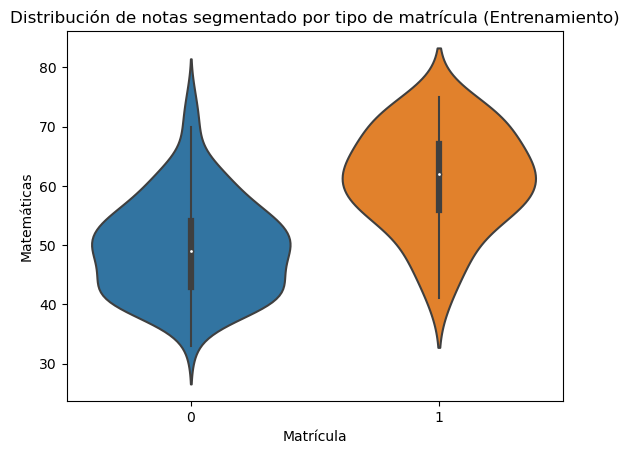

In [21]:
fig, ax = plt.subplots()
sb.violinplot( x = yEntrenamiento['Matrícula'], y = XEntrenamiento['Matemáticas'], ax = ax)
ax.set_title('Distribución de notas segmentado por tipo de matrícula (Entrenamiento)')
plt.show()

In [22]:
#MODELADO
modelo = LogisticRegression()
modelo.fit(XEntrenamiento, yEntrenamiento)

LogisticRegression()

In [23]:
print('beta_0: ', modelo.intercept_)
print('beta_1: ', list(zip(X.columns, modelo.coef_.flatten())))

beta_0:  [-9.5220931]
beta_1:  [('Matemáticas', 0.15251143403094547)]


In [24]:
predEntrenamiento = modelo.predict(XEntrenamiento)
desEntrenamiento = accuracy_score(yEntrenamiento, predEntrenamiento)
print(f'El desempeño en Entrenamiento es {desEntrenamiento}')

El desempeño en Entrenamiento es 0.8142857142857143


In [25]:
predPrueba = modelo.predict(XPrueba)
desPrueba = accuracy_score(yPrueba, predPrueba)
print(f'El desempeño en Entrenamiento es {desPrueba}')

El desempeño en Entrenamiento es 0.8


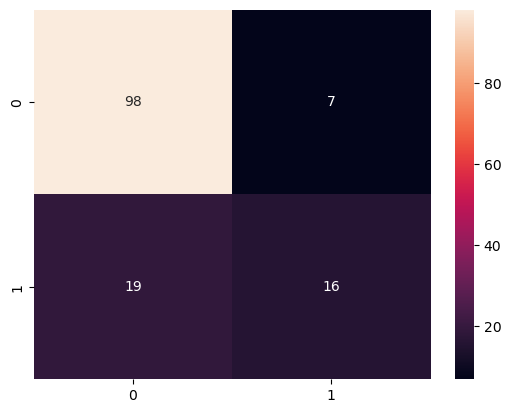

In [27]:
matrizEntrenamiento = confusion_matrix(yEntrenamiento, predEntrenamiento)
sb.heatmap(matrizEntrenamiento, annot = True, fmt = 'd')
plt.show()

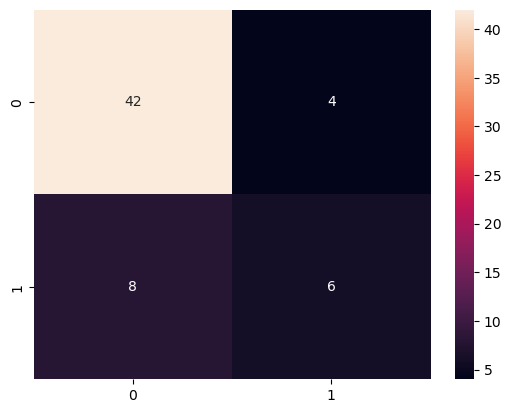

In [28]:
matrizPrueba = confusion_matrix(yPrueba, predPrueba)
sb.heatmap(matrizPrueba, annot = True, fmt = 'd')
plt.show()